In [1]:
from PFDFile import *
import numpy as np
import os
import pylab as plt
#cand = PFD("p309n_pfd/SM0001_07041.sf_0.31ms_Cand.pfd")

In [2]:
def info(param):
    print(type(param))
    if type(param) is np.ndarray:
        print('dim: ' + str(param.shape))
    elif type(param) is list or tuple:
        print('len:' + str(len(param)))

In [2]:
def make_data(dir, num=10):
	l = list()
	for file in os.listdir(dir):
		cand = PFD(dir + './' + file)
		l.append(cand)        
		if len(l) is num:
			break
	return l

In [3]:
n = make_data('./p309n_pfd', num=10)

In [4]:
l = make_data('./p309p_pfd')

In [21]:
def gather_feature(dir):
	X = []
	for file in os.listdir(dir):
		cand = PFD(dir + './' + file)
		print(len(X), dir + './' + file)
		try:
			sample = np.array([cand.get_subints().shape[1], len(cand.getprofile()), cand.calc_redchi2()])
		except:
			sample = np.array([cand.get_subints().shape[1], len(cand.getprofile()), cand.calc_redchi2()])
		X.append(sample)
	X = np.array(X)
	print(X.shape)
	return X

In [17]:
def save_data(X, Y):
	from sklearn.externals import joblib
	with open('4feat.fzy', 'wb') as fo: 
		joblib.dump((X, Y), fo)
	print('data saved')

In [25]:
Yn

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
#Xn = gather_feature('./p309n_pfd')
#Yn = np.repeat(0, Xn.shape[0])
Yn = Yn.reshape(Yn.shape[0], 1)
#Xp = gather_feature('./p309p_pfd')
#Yp = np.repeat(1, Xp.shape[0])
Yp = Yp.reshape(Yp.shape[0], 1)
X = np.vstack((Xn, Xp))
Y = np.vstack((Yn, Yp))
save_data(X, Y)

data saved


In [9]:
cnt = 0
for cand in n:
	try:
		print(cand.get_subbands().shape)
	except:
		print('error')
		cnt += 1
print(cnt / 25)

(32, 2)
(32, 5)
(32, 5)
(32, 64)
(32, 64)
(32, 3)
(32, 3)
(32, 12)
(32, 64)
(32, 64)
0.0


In [9]:
# subbands and subints are both interval-summed profiles vs. subband(32 dim)  ???
print(n[7].get_subbands())
print(set([cand.get_subbands().shape for cand in n]))
print(set([cand.get_subbands().shape for cand in l]))

[[ 214.2341439   255.          111.12293909   24.37576525  121.1872466
   195.2339091   236.31938549  207.03119535  242.69809356  122.82718232
     0.          162.77589105]
 [ 255.          137.02135762   56.3015255   155.1329205    85.5112075
   100.35132685    0.           36.89265777   69.90705896   24.07501601
    21.2177674   136.24070897]
 [ 233.77430873   74.09211042   47.15787299  156.32310093   48.11316914
     0.          146.5864844    38.00615578   30.04591039  129.76060874
   255.          234.50004749]
 [ 255.          193.64520231  136.42814634  149.10488423  105.14480883
     0.           25.12997713  127.35540275  249.52319244   99.96617547
   185.66614509  232.32121615]
 [ 163.02759243  111.25489873  184.65400063  229.73615606  255.
   181.76993737   13.98866156    0.           58.25112702  140.62192741
   130.71521025  146.83641458]
 [   9.18798027  176.42644171  169.12709828  119.05552145    0.
    59.88038683   39.14404336  181.37562573  255.          177.25470284

In [12]:
n[1].get_subbands().shape

(32, 5)

In [7]:
# Plot the interval-summed profiles vs subband. (64, ?)
print(type(n[0].get_subints()))
print(set([cand.get_subints().shape for cand in n]))
print(set([cand.get_subints().shape for cand in l]))

<class 'numpy.ndarray'>
{(64, 64), (64, 12), (64, 5), (64, 3), (64, 2)}
{(64, 64), (64, 60)}


In [19]:
# Obtains the profile data---- what is a profile?
print(l[2].getprofile())
print(sum(l[2].getprofile())/64)
print(sum(n[2].getprofile())/60)
print([len(cand.getprofile()) for cand in n])
print([len(cand.getprofile()) for cand in l])
n[8].getprofile()

[10.384227180928024, 121.38533340166742, 145.65400261171476, 187.62414056632653, 105.47883171112703, 121.33803609145154, 73.790560629293111, 157.45906899139538, 164.00197732193936, 39.719878063626005, 111.67393851368757, 77.444900417422886, 121.51954520204205, 110.55335008686576, 121.94204250824541, 163.50706124429894, 148.67119358906271, 127.44214088312974, 167.02645404154362, 153.31435125263329, 126.05001853221188, 79.585461857229987, 7.1827358792040812, 126.35028858880885, 184.88780283912214, 144.0071733474974, 0.0, 75.990974488475103, 165.84429452546351, 122.89913036708683, 94.465381508382649, 33.792503494062615, 58.559775206325099, 95.097755082330863, 123.70669699729905, 156.50705622359536, 164.99523528678742, 86.630526556169727, 70.611502487708222, 59.028772040004888, 117.31839066506816, 67.191527523808517, 80.305054219527833, 61.562530400860616, 101.66795021980285, 214.25046312463482, 127.23919826452392, 101.0100994416578, 63.133055435297571, 166.42363847697283, 95.3101920320449

[185.80448122163693,
 211.93258275010598,
 150.4326569598789,
 160.45609909228978,
 172.27250092231634,
 142.86524276659927,
 188.5632076405939,
 216.18442521340666,
 111.42632371584502,
 158.5254021179787,
 163.08959004788517,
 132.95994569840246,
 155.41852313519365,
 64.528804475196395,
 160.96395577266483,
 165.82331895813252,
 150.43408475195744,
 108.59289626188472,
 95.303140859282905,
 90.92455847368285,
 123.46519567653345,
 110.07733632436988,
 131.97629364109031,
 110.9243773918425,
 88.061519543658264,
 102.88875590934978,
 145.6537935238766,
 146.05538415777198,
 129.46767494505377,
 192.54887785427266,
 148.43986967282748,
 175.3926086096148,
 110.02219109996979,
 126.51118659186798,
 113.15700974396019,
 86.916571887238831,
 30.822203715947715,
 72.649916664717921,
 45.90976335785637,
 113.25194853428387,
 55.224687860993953,
 57.896081655032241,
 78.173189444915835,
 73.452645725494406,
 100.84329325935676,
 118.93286065451495,
 105.59369227185454,
 84.099367126857615,


In [19]:
np.sum([[1,2],[3,4]], axis=1)

array([3, 7])

In [116]:
a, b = l[7].plot_chi2_vs_DM(0, 800)

In [117]:
diff = np.array([n-l for l, n in zip(a, a[1:])])

In [118]:
len(diff)

99

In [133]:
print(sum(np.abs(diff)>0.5))
print(np.var(diff))

6
0.0621906


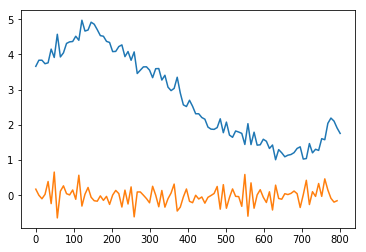

In [122]:
plt.plot(b, a)
plt.plot(b[:-1], diff)
plt.show()

<class 'tuple'>
len:2


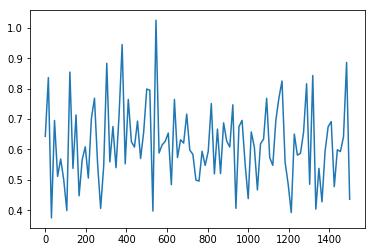

<class 'tuple'>
len:2


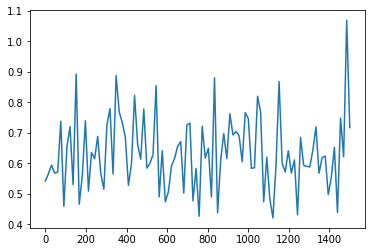

<class 'tuple'>
len:2


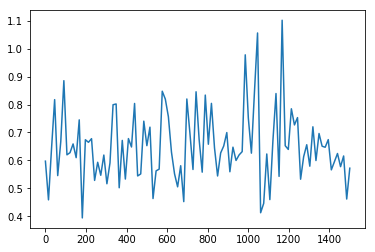

<class 'tuple'>
len:2


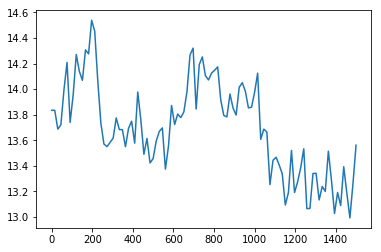

<class 'tuple'>
len:2


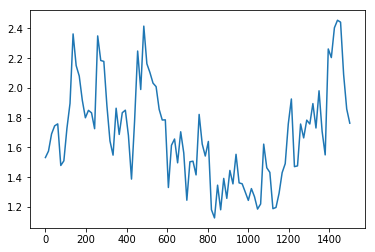

<class 'tuple'>
len:2


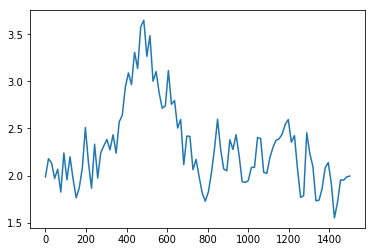

<class 'tuple'>
len:2


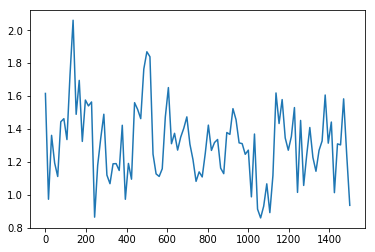

<class 'tuple'>
len:2


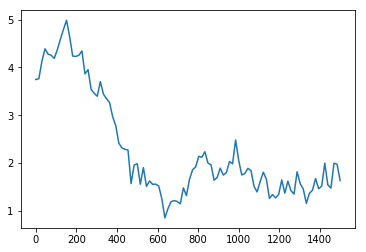

<class 'tuple'>
len:2


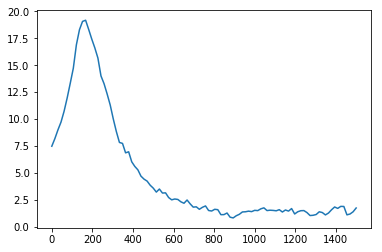

<class 'tuple'>
len:2


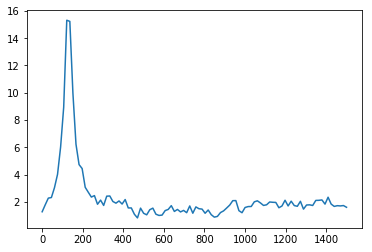

<class 'tuple'>
len:2


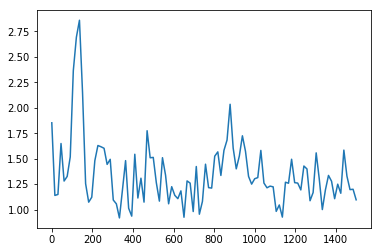

<class 'tuple'>
len:2


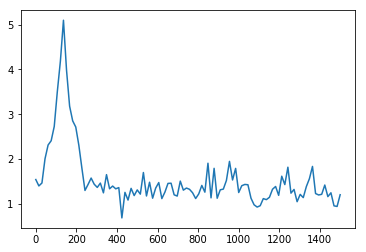

<class 'tuple'>
len:2


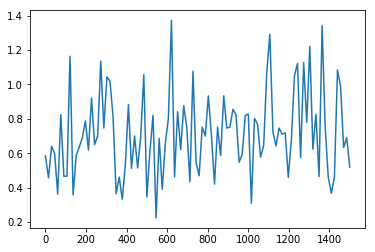

<class 'tuple'>
len:2


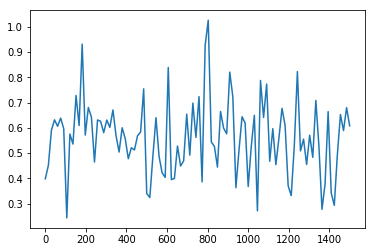

<class 'tuple'>
len:2


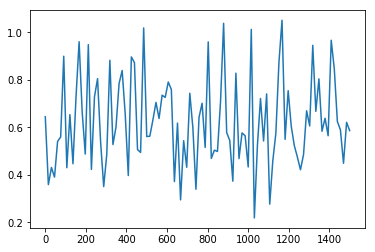

<class 'tuple'>
len:2


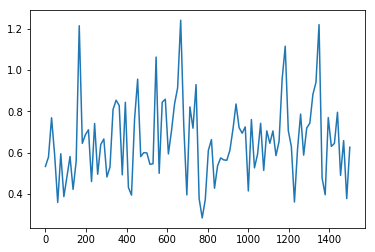

<class 'tuple'>
len:2


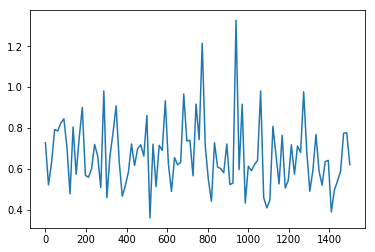

<class 'tuple'>
len:2


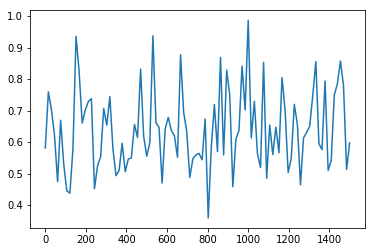

<class 'tuple'>
len:2


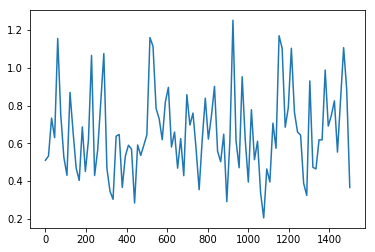

<class 'tuple'>
len:2


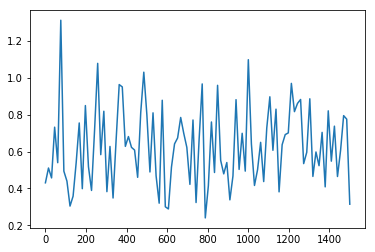

In [66]:
for cand in l:
	tmp = cand.plot_chi2_vs_DM(0, 1500)
	info(tmp)
	plt.plot(tmp[1], tmp[0], '-')
	plt.show()

<class 'tuple'>
len:2


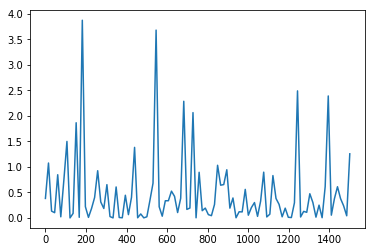

<class 'tuple'>
len:2


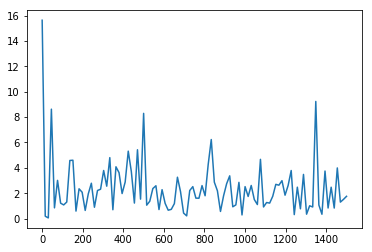

<class 'tuple'>
len:2


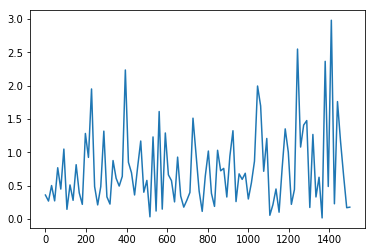

<class 'tuple'>
len:2


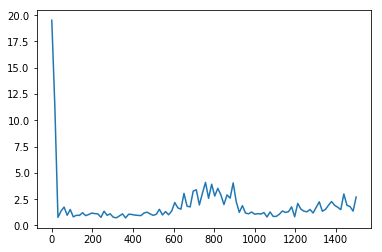

<class 'tuple'>
len:2


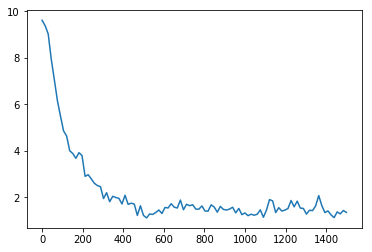

<class 'tuple'>
len:2


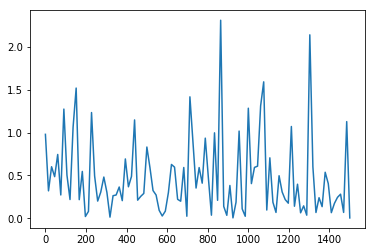

<class 'tuple'>
len:2


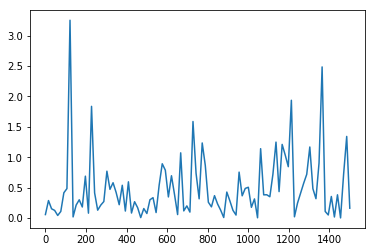

<class 'tuple'>
len:2


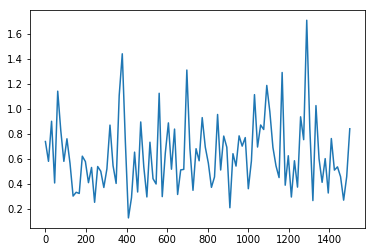

<class 'tuple'>
len:2


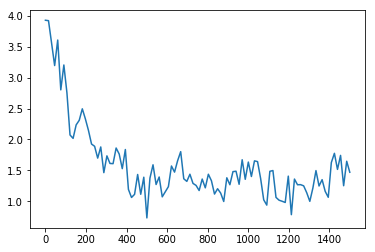

<class 'tuple'>
len:2


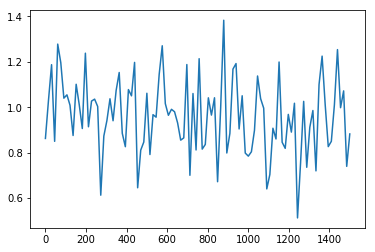

<class 'tuple'>
len:2


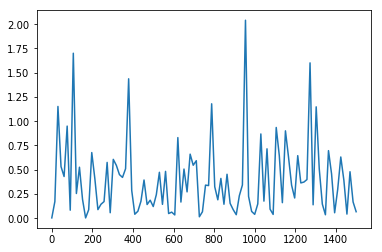

<class 'tuple'>
len:2


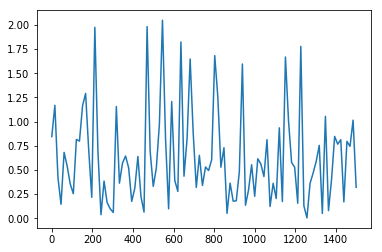

<class 'tuple'>
len:2


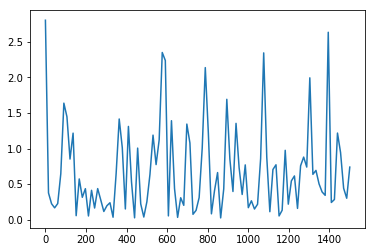

<class 'tuple'>
len:2


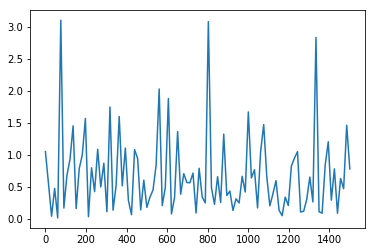

<class 'tuple'>
len:2


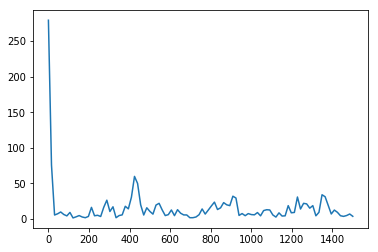

<class 'tuple'>
len:2


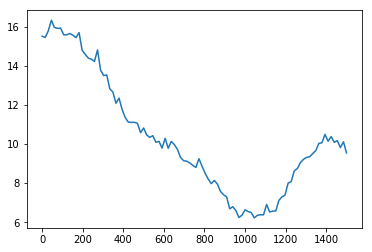

<class 'tuple'>
len:2


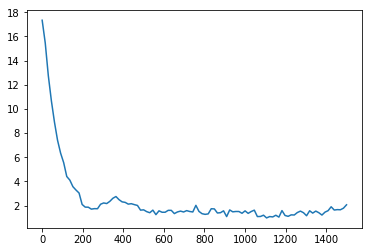

<class 'tuple'>
len:2


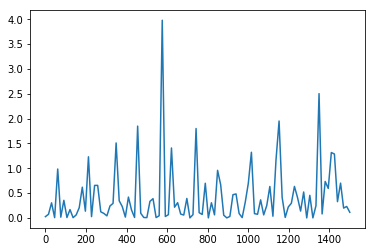

<class 'tuple'>
len:2


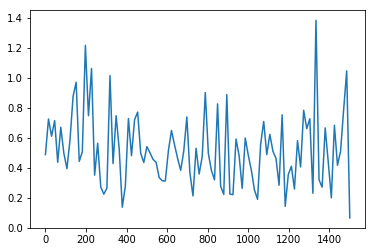

<class 'tuple'>
len:2


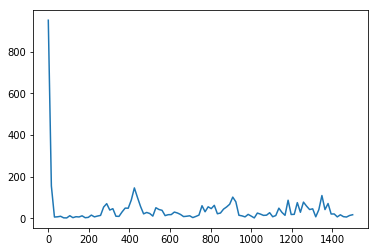

In [73]:
for cand in n:
	tmp = cand.plot_chi2_vs_DM(0, 1500)
	info(tmp)
	plt.plot(tmp[1], tmp[0], '-')
	plt.show()

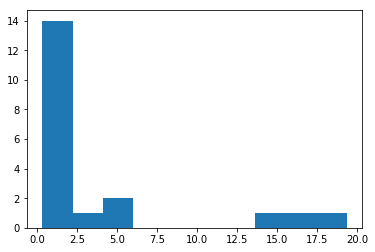

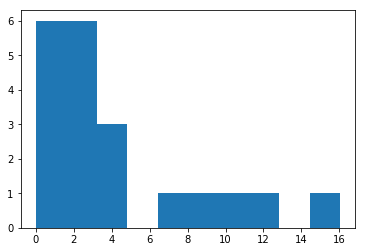

In [77]:
plt.hist([cand.calc_redchi2() for cand in l])
plt.show()
plt.hist([cand.calc_redchi2() for cand in n])
plt.show()

In [134]:
def plot_subbands(cand):
	import pylab as plt
	plt.figure(1, figsize=(9,9), dpi=150)
	plt.subplot(311)
	plt.imshow(cand.get_subbands(), origin='lower', interpolation='nearest',aspect='auto',cmap=plt.cm.Greys)
	plt.title('sub-Bands')
	plt.ylabel('Band Index')

	plt.subplot(312)
	plt.imshow(cand.get_subints(), origin='lower', interpolation='nearest',aspect='auto',cmap=plt.cm.Greys)
	plt.title('sub-ints')
	plt.ylabel('intergration Index')

	plt.subplot(313)
	plt.bar(range(len(cand.getprofile())), cand.getprofile(), width=1)
	plt.xlim(0, len(cand.getprofile()))
	plt.xlabel('Phase bin index')
	plt.show()

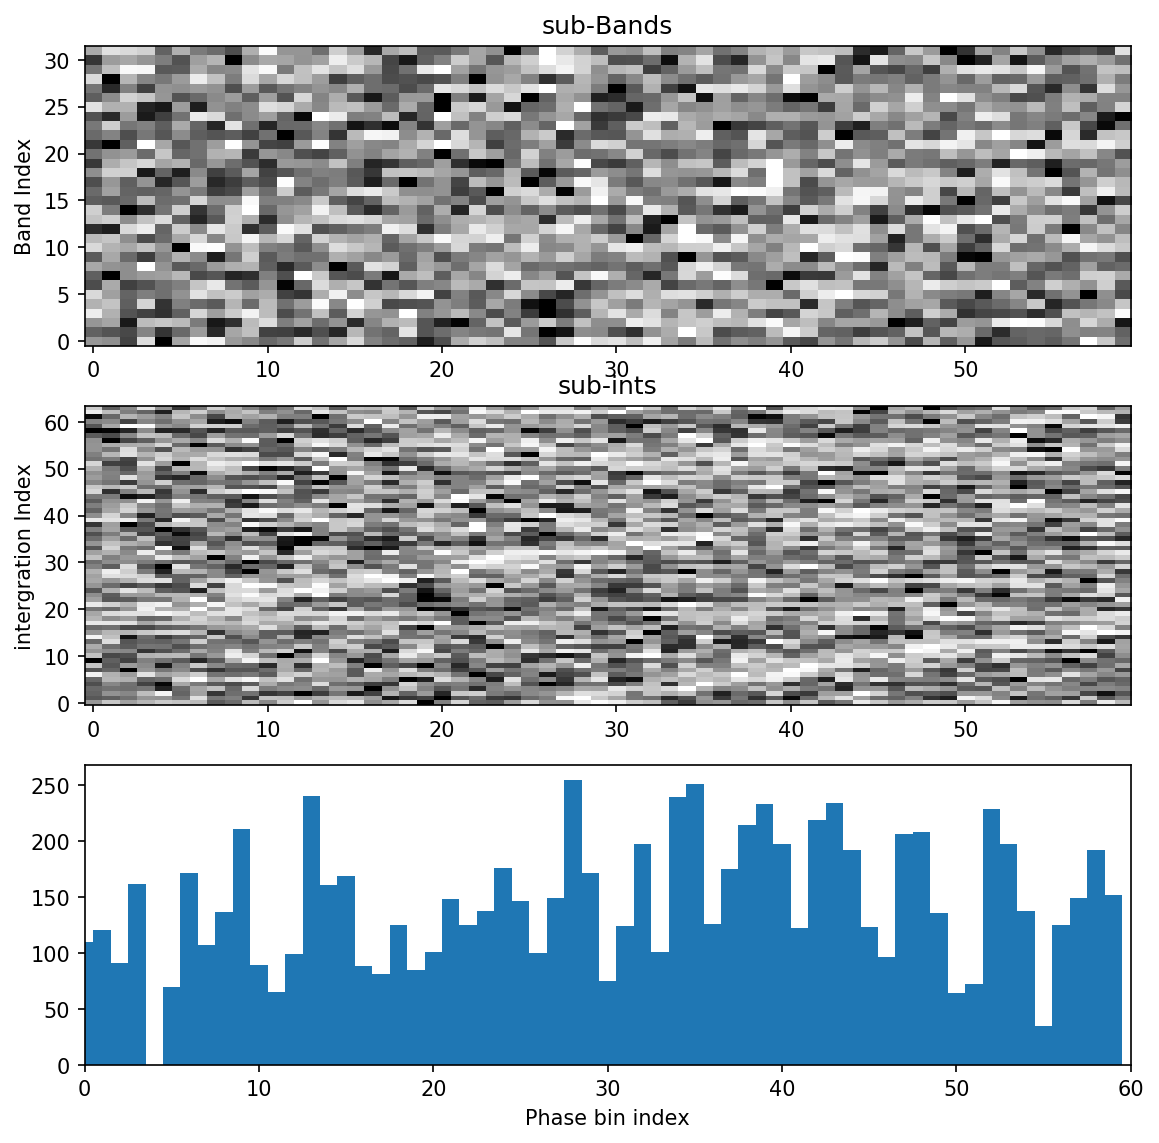

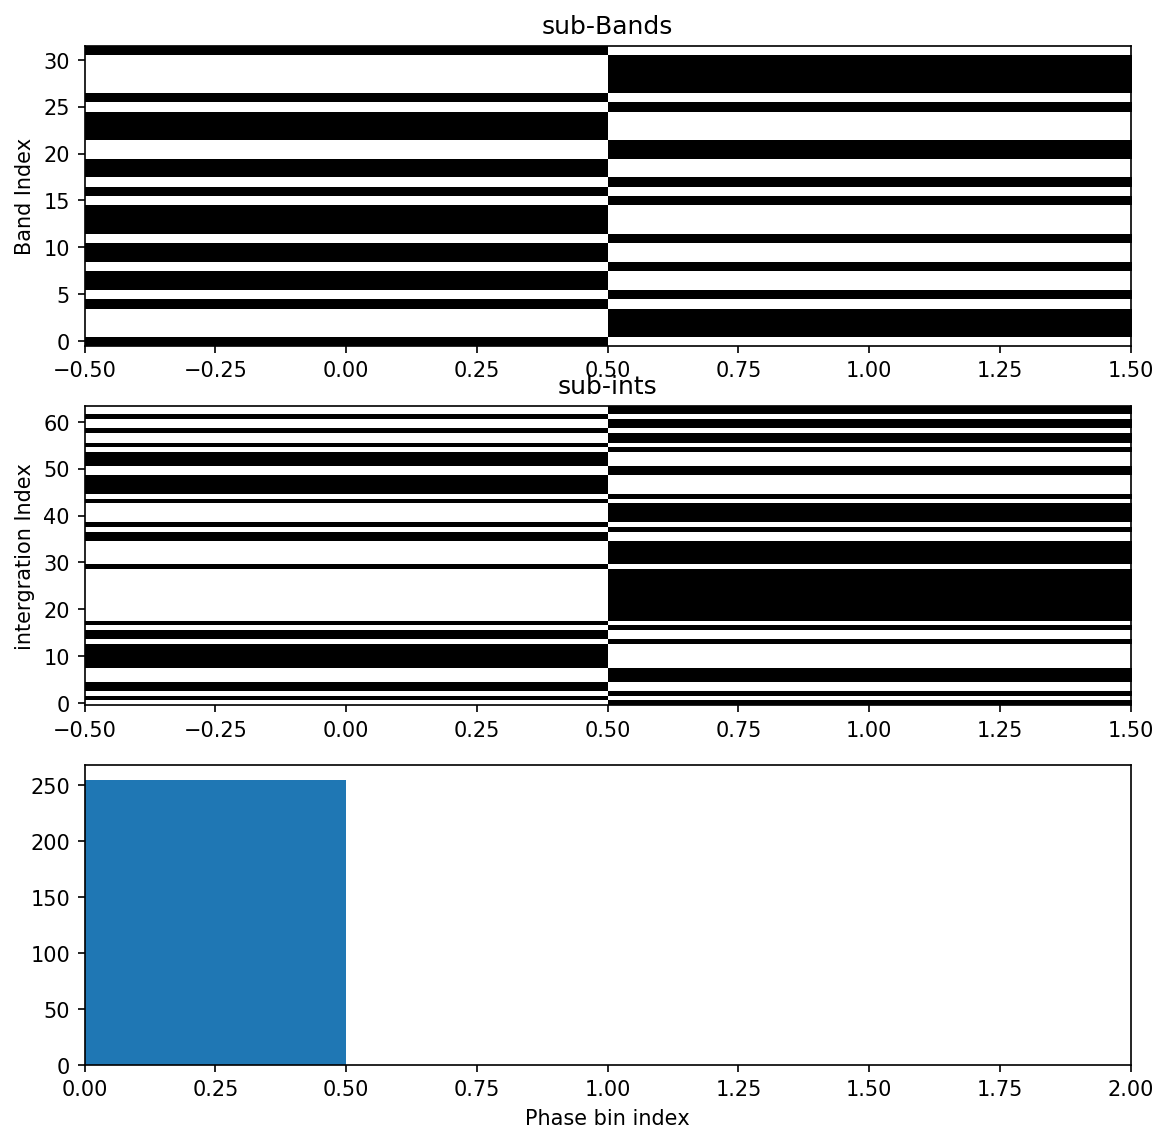

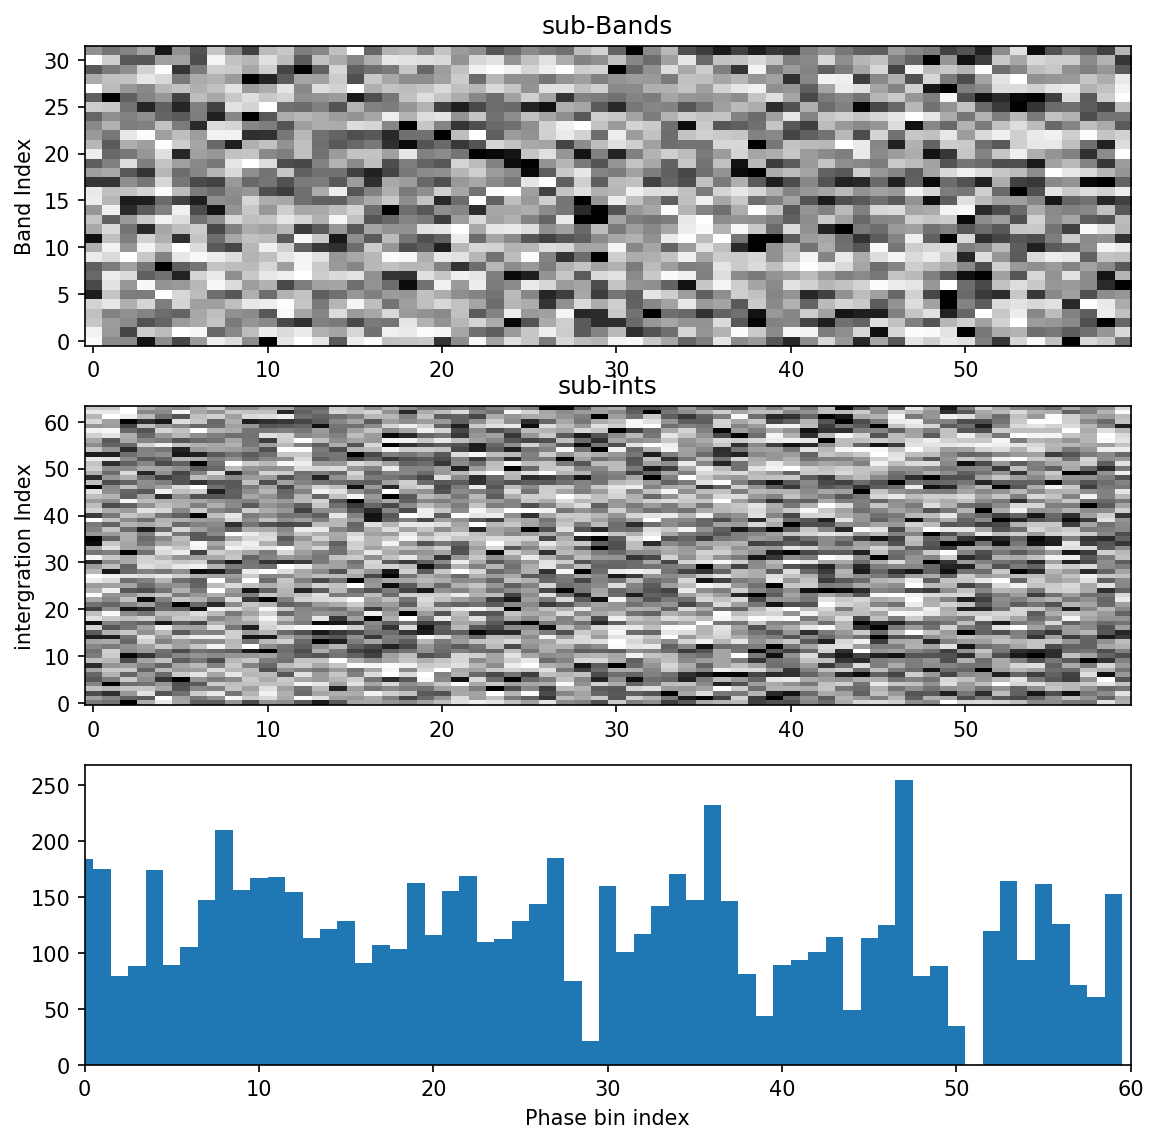

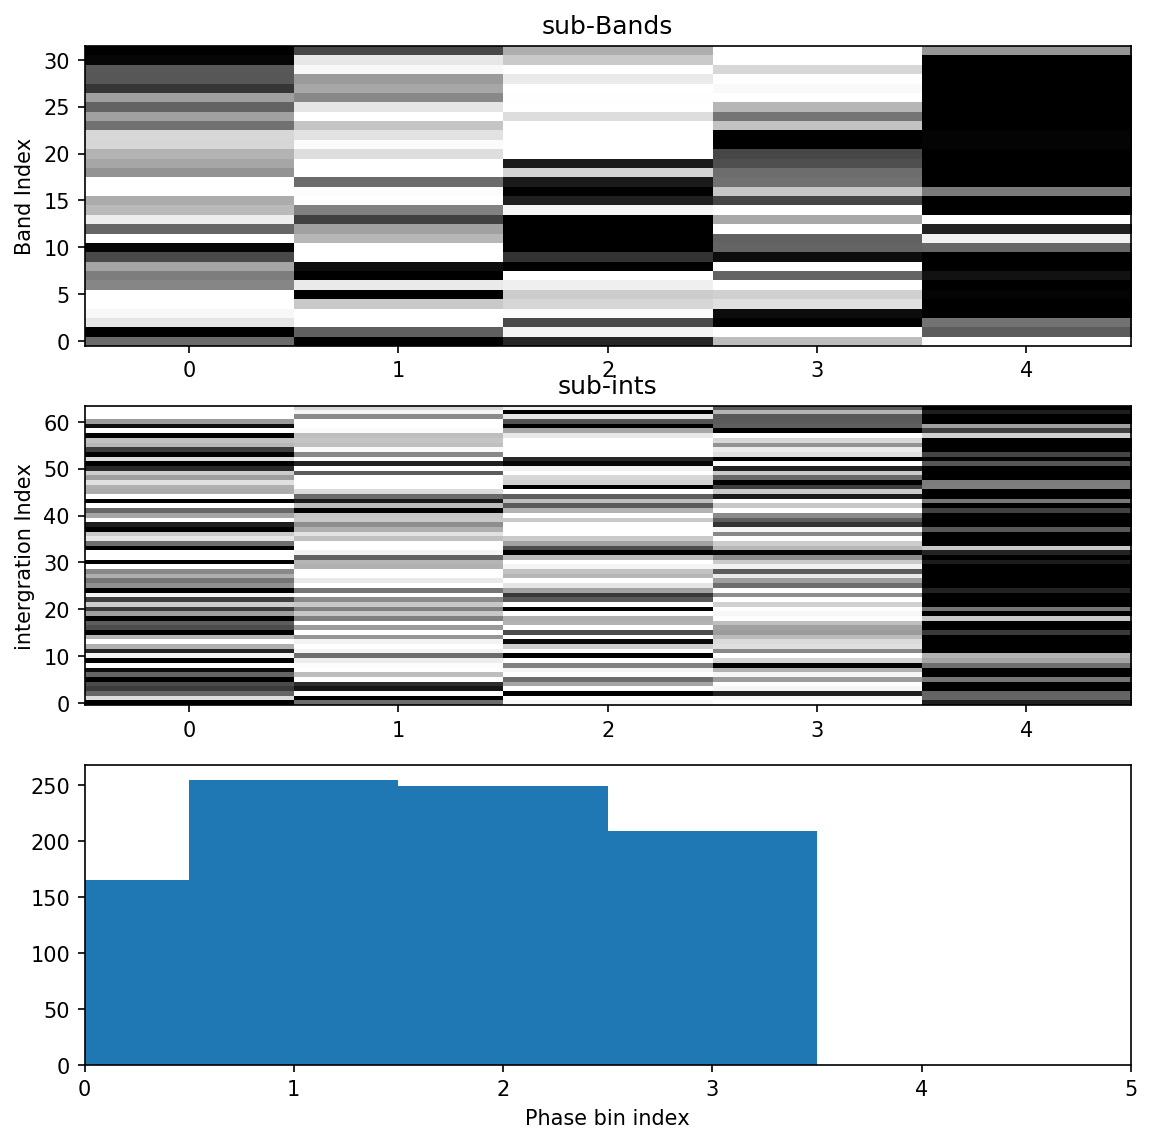

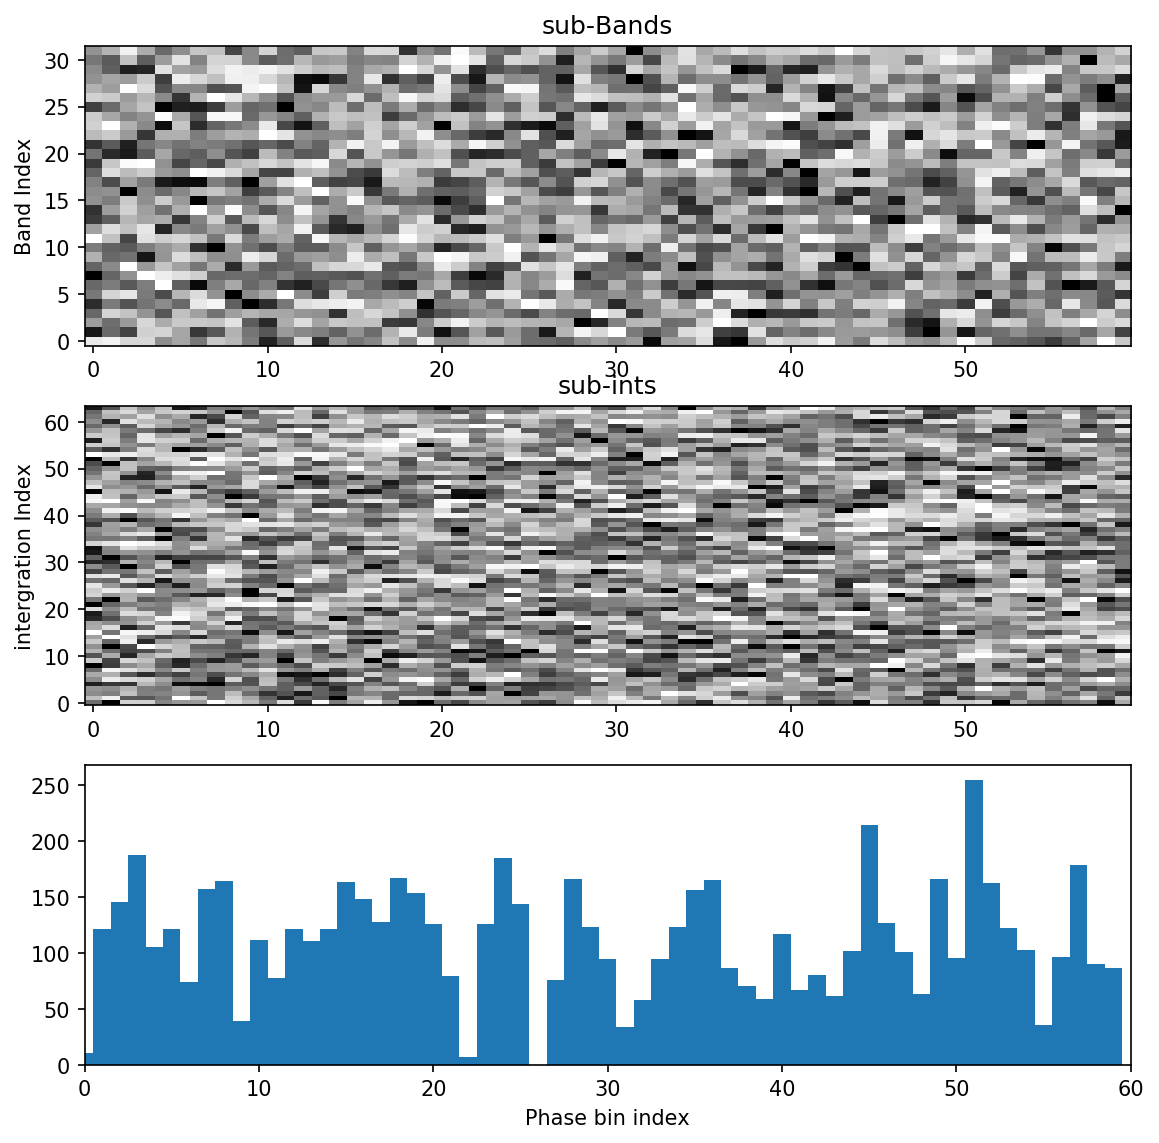

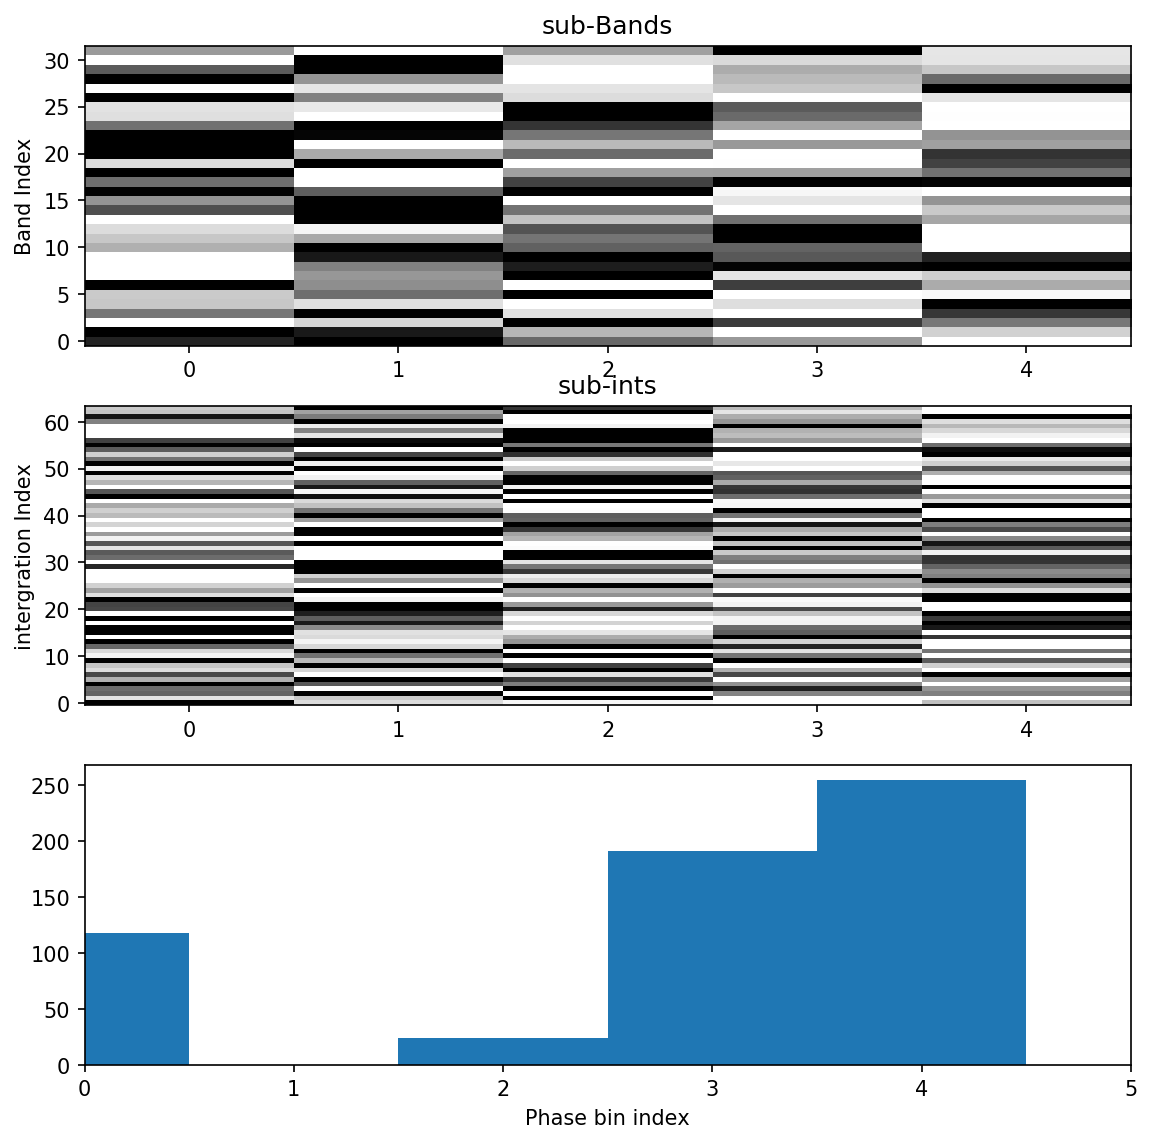

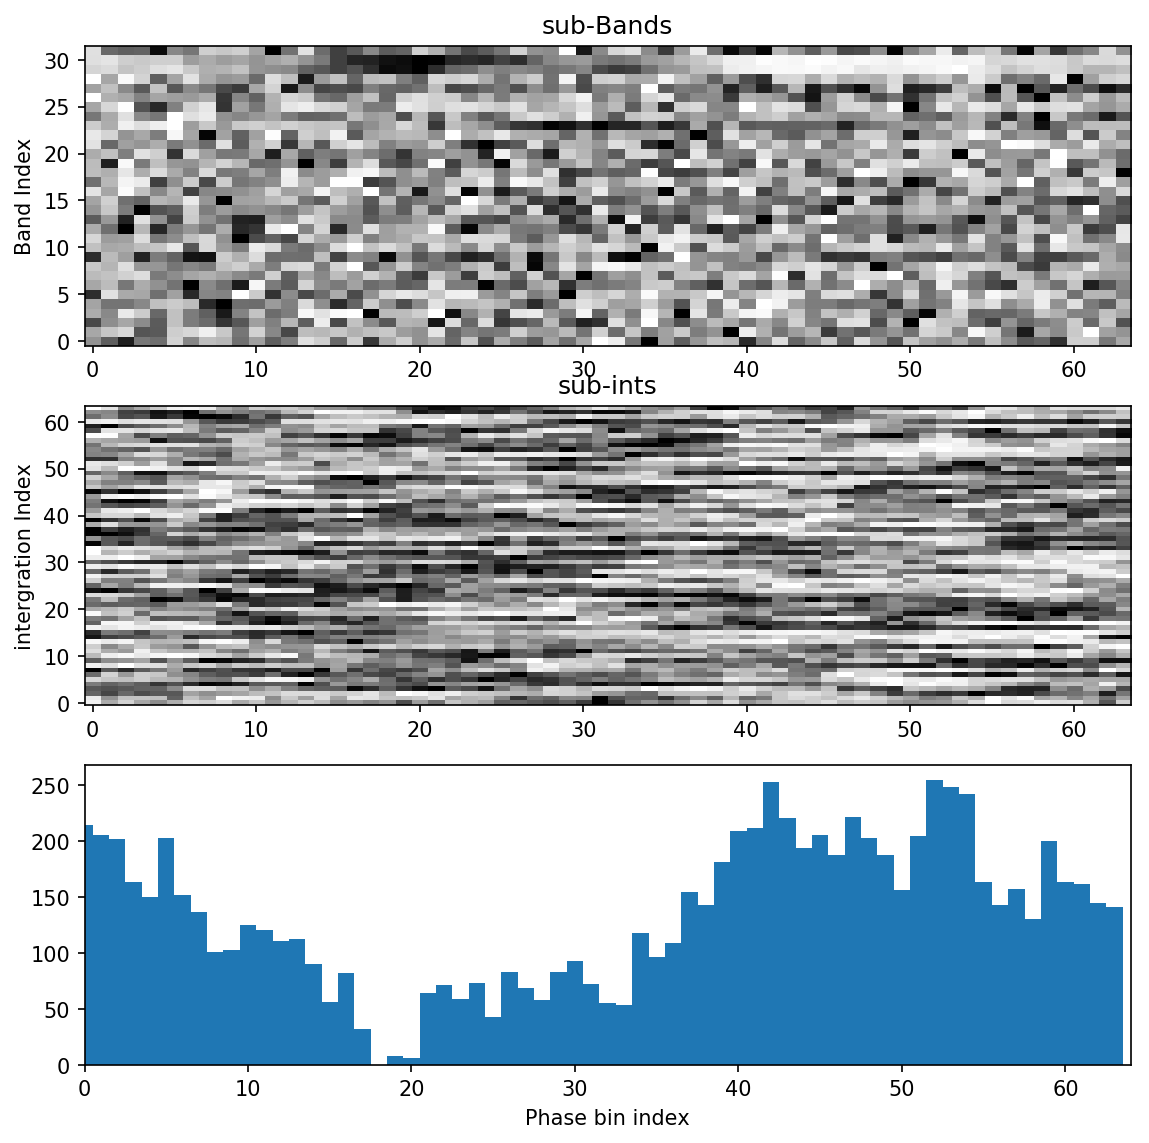

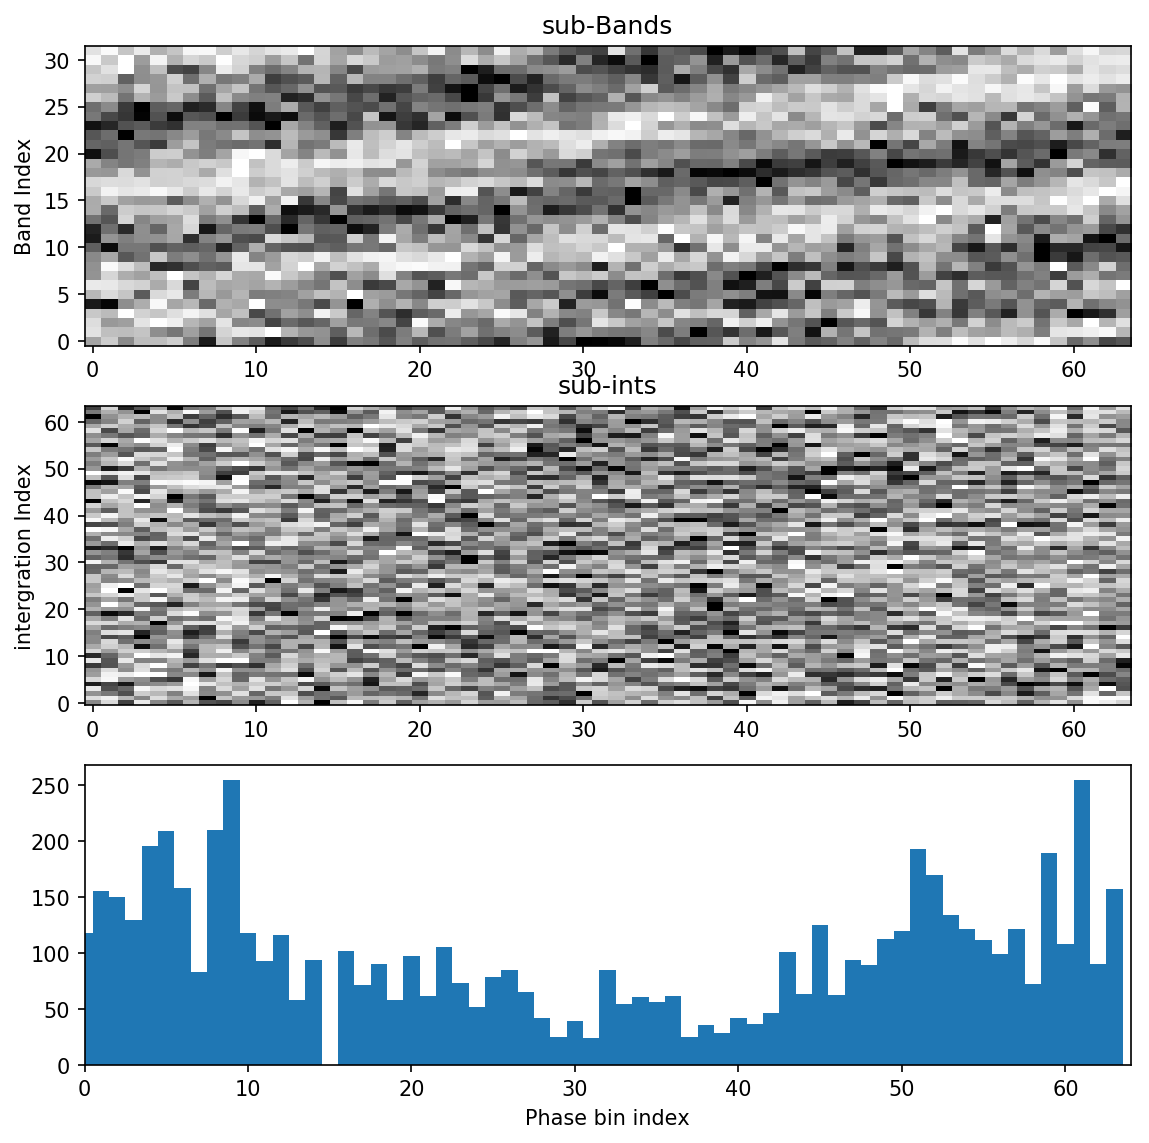

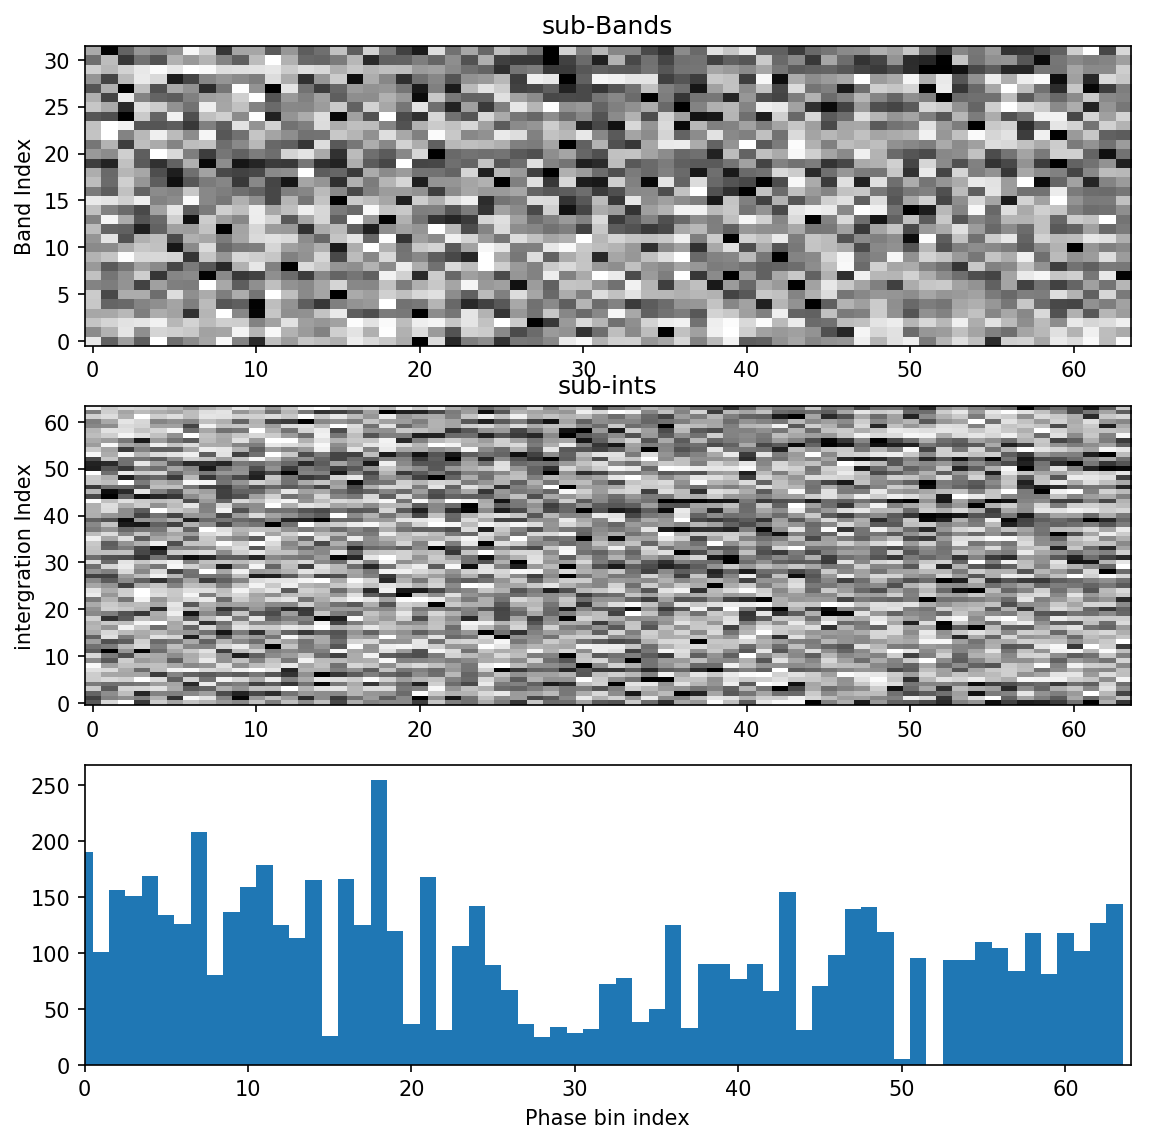

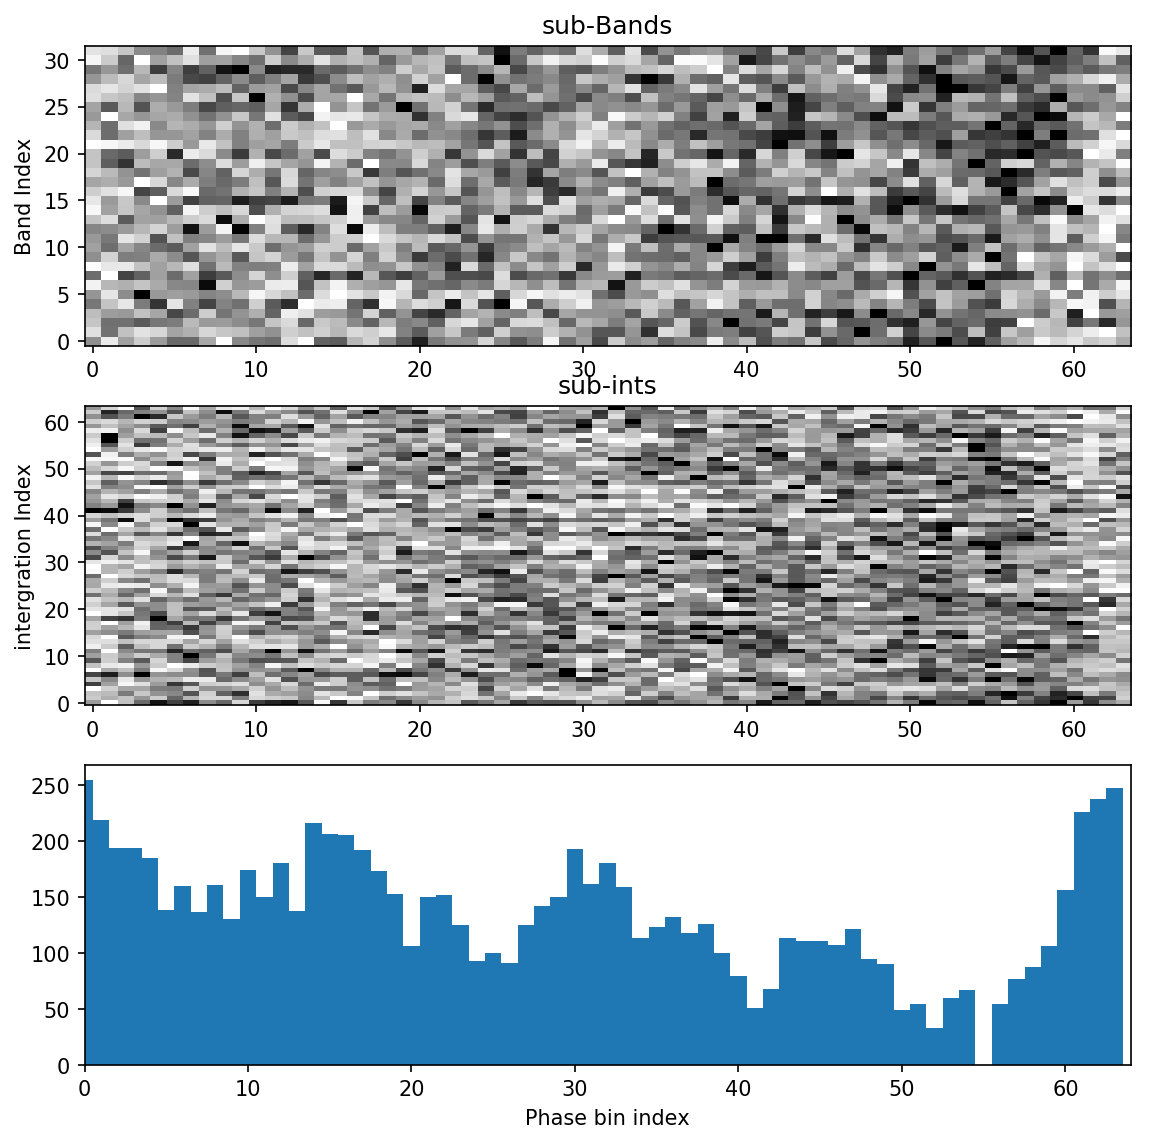

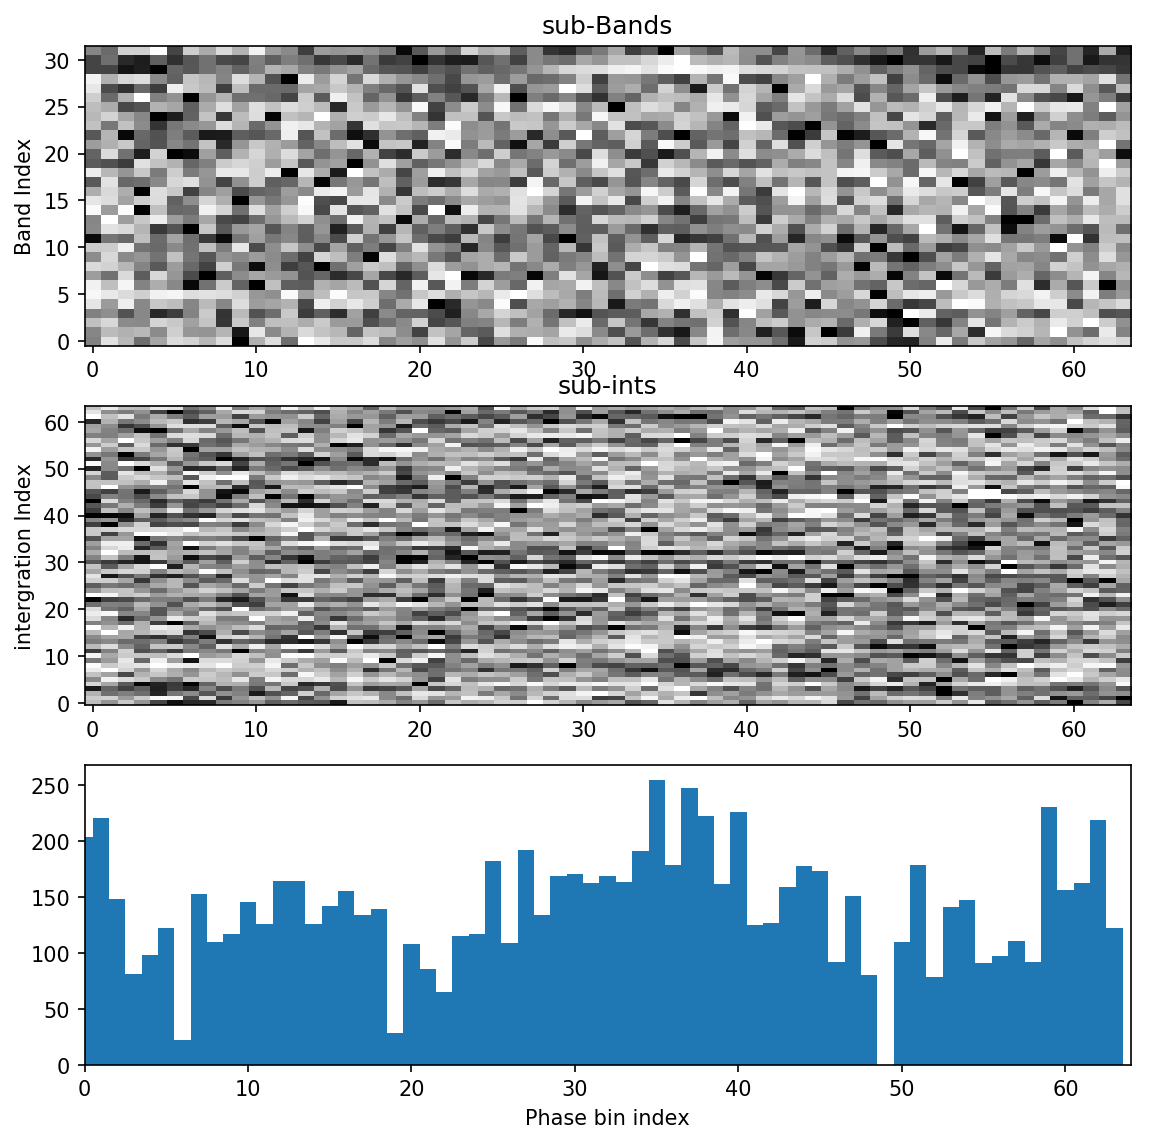

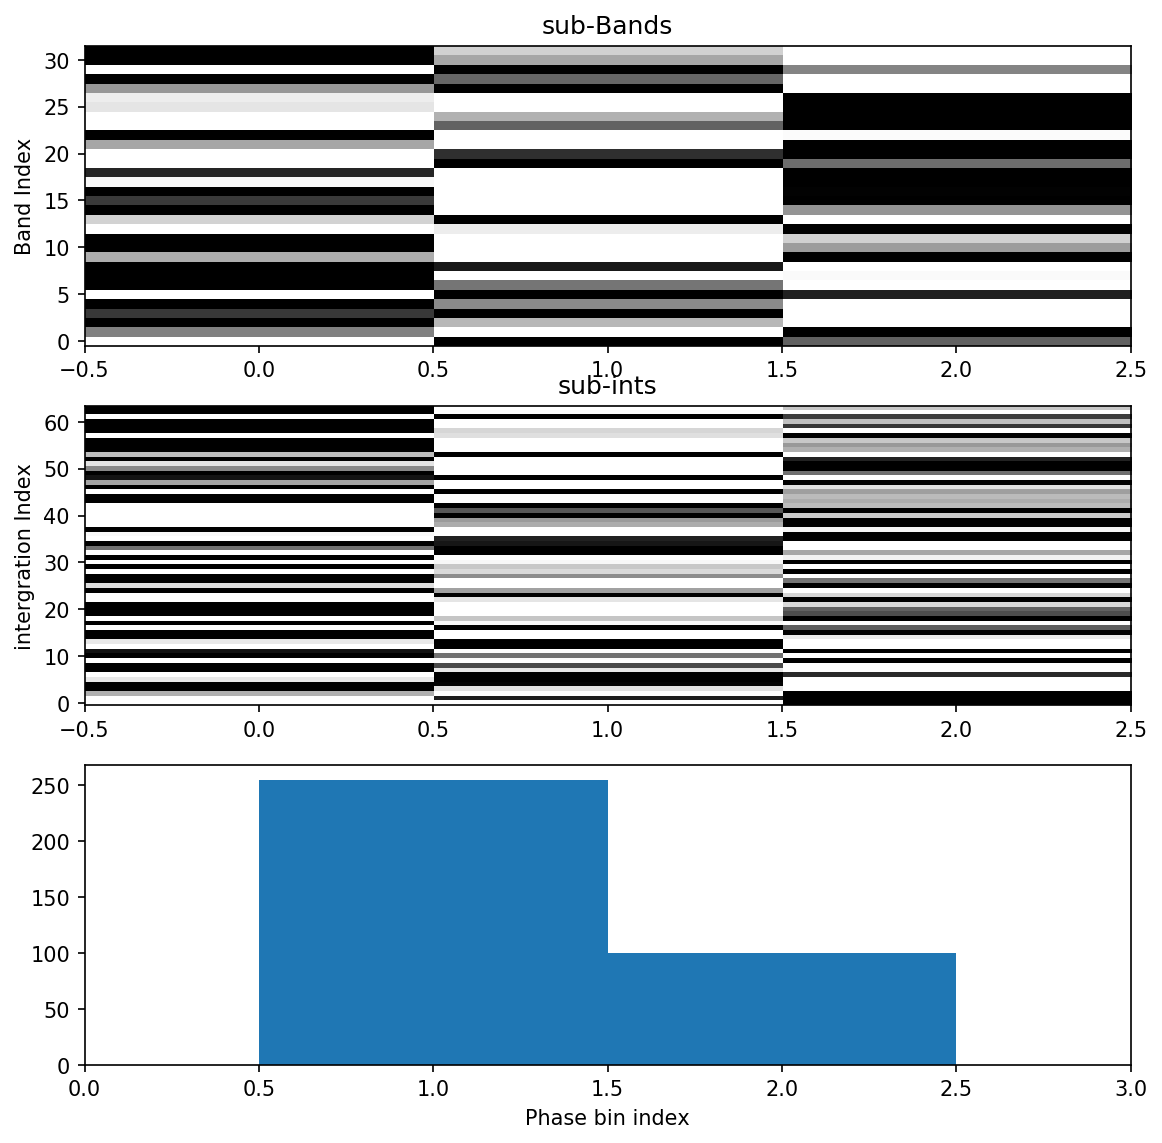

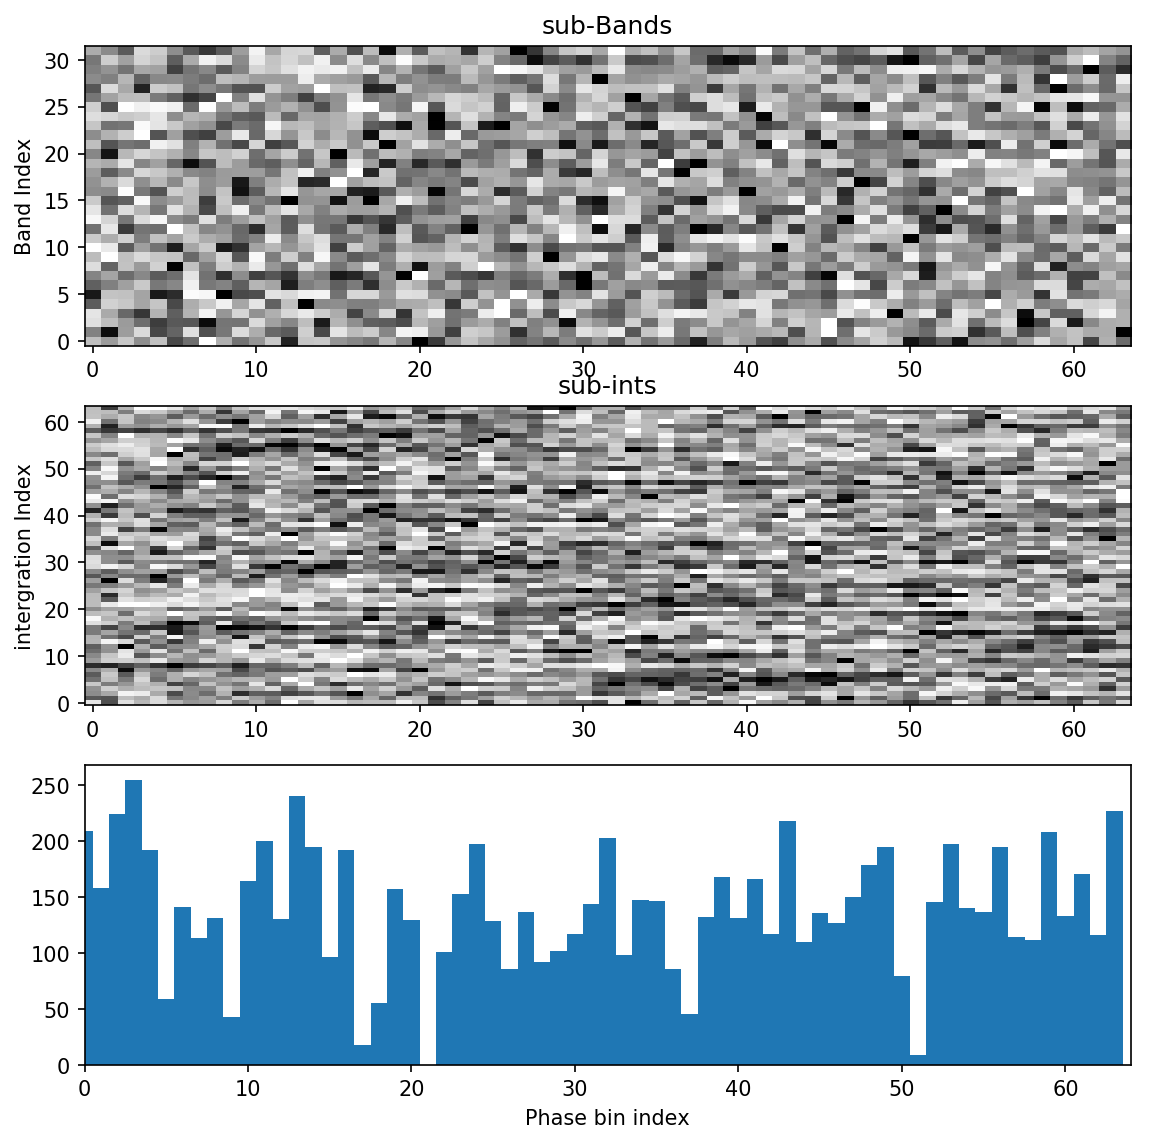

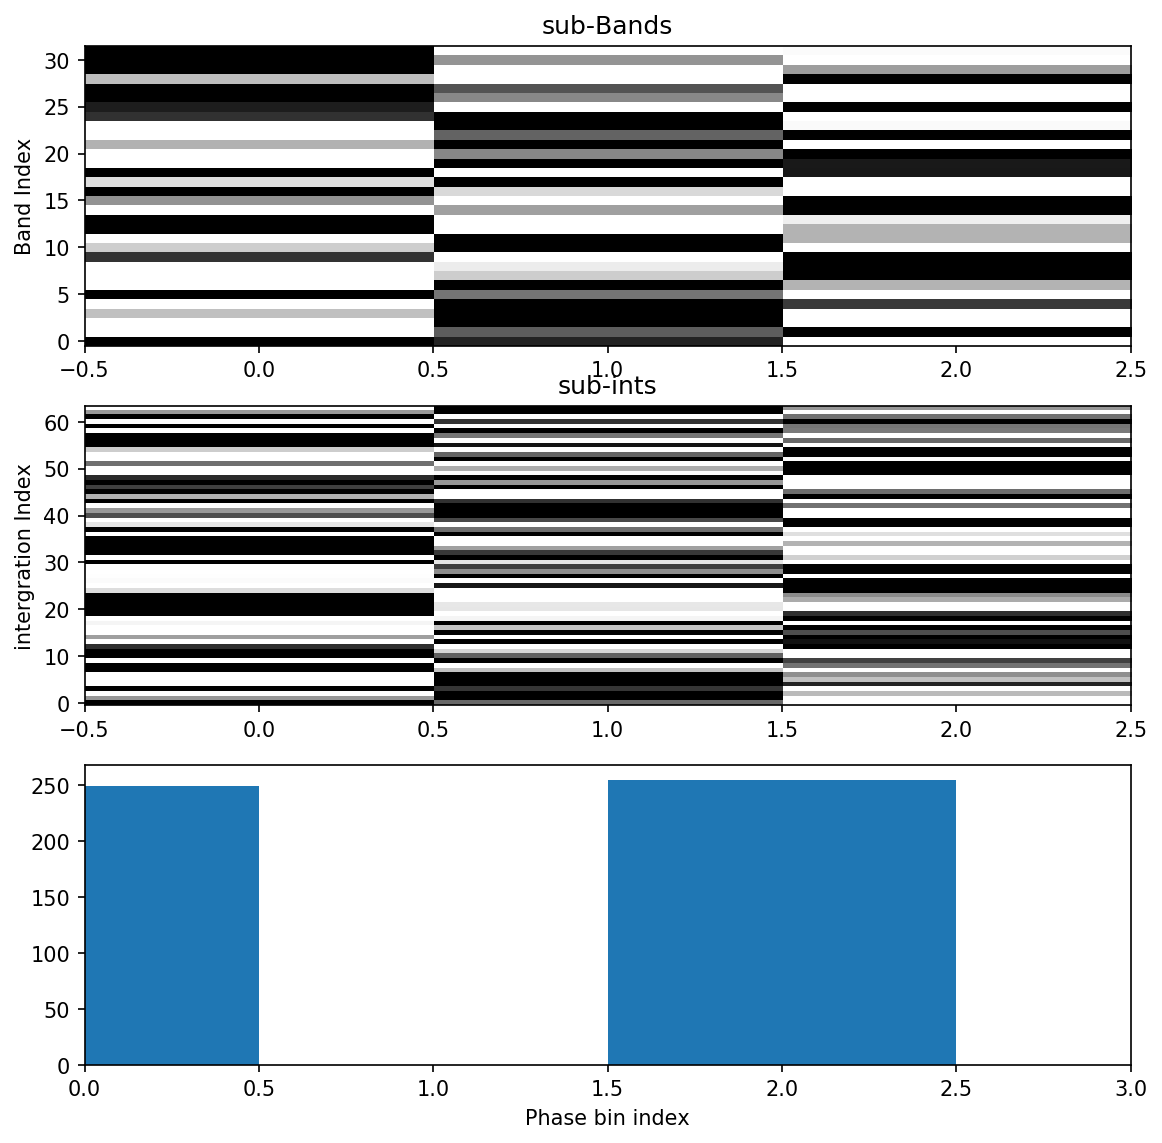

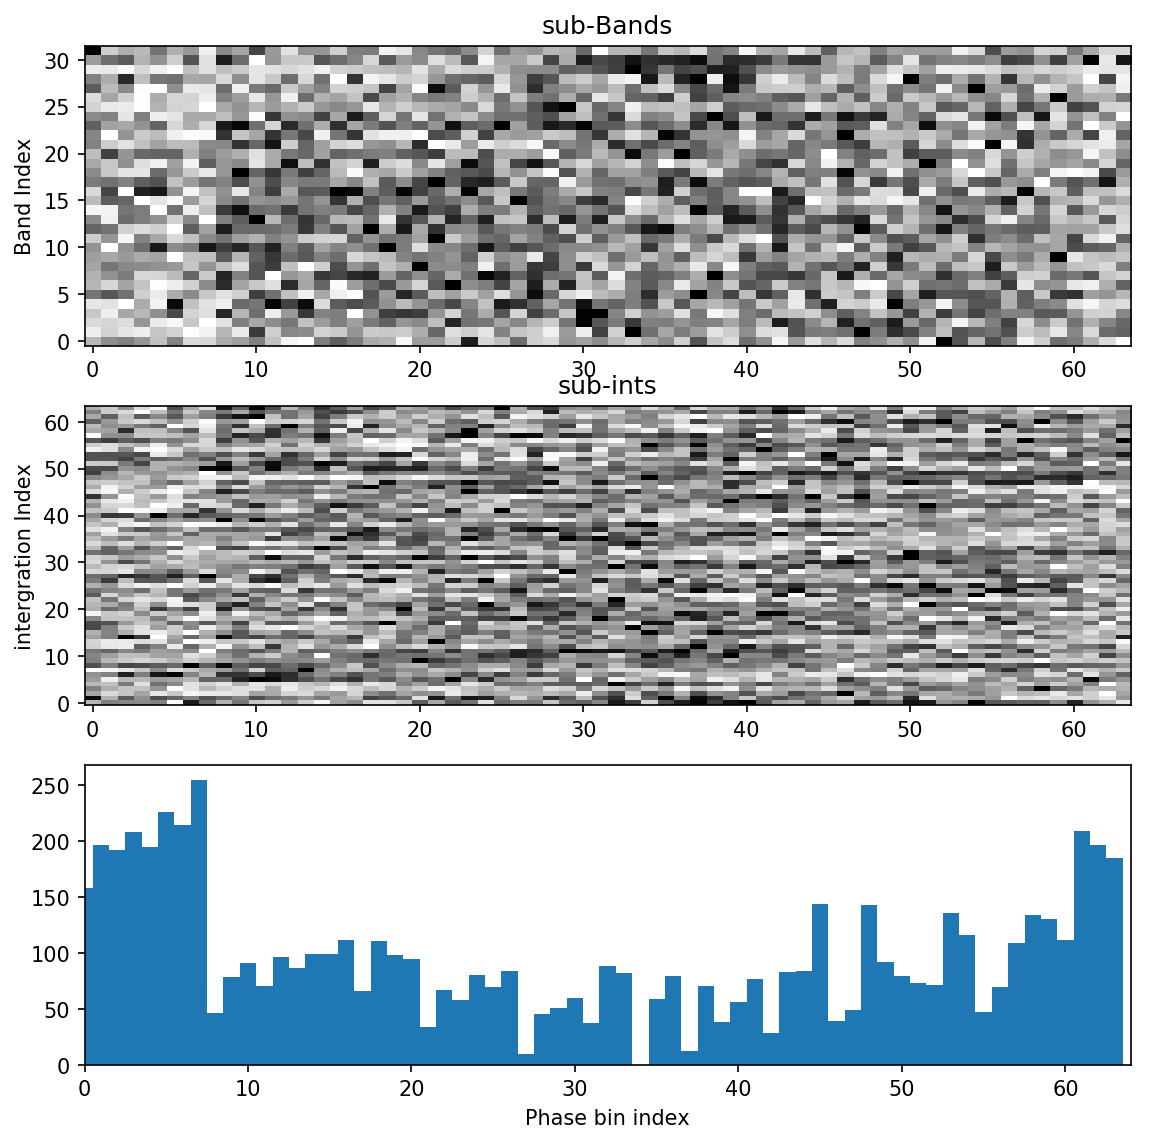

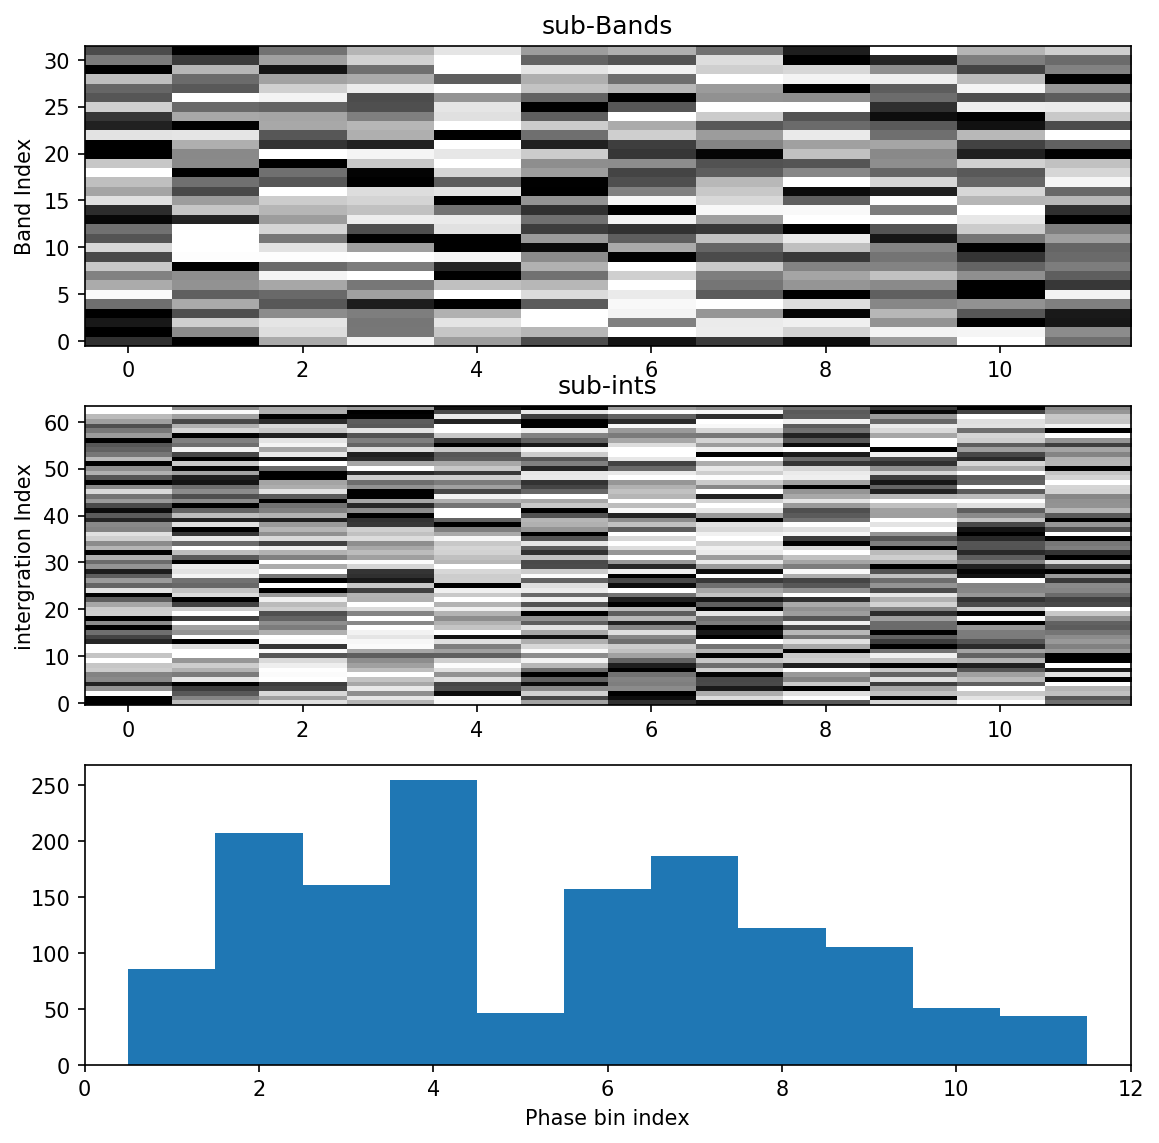

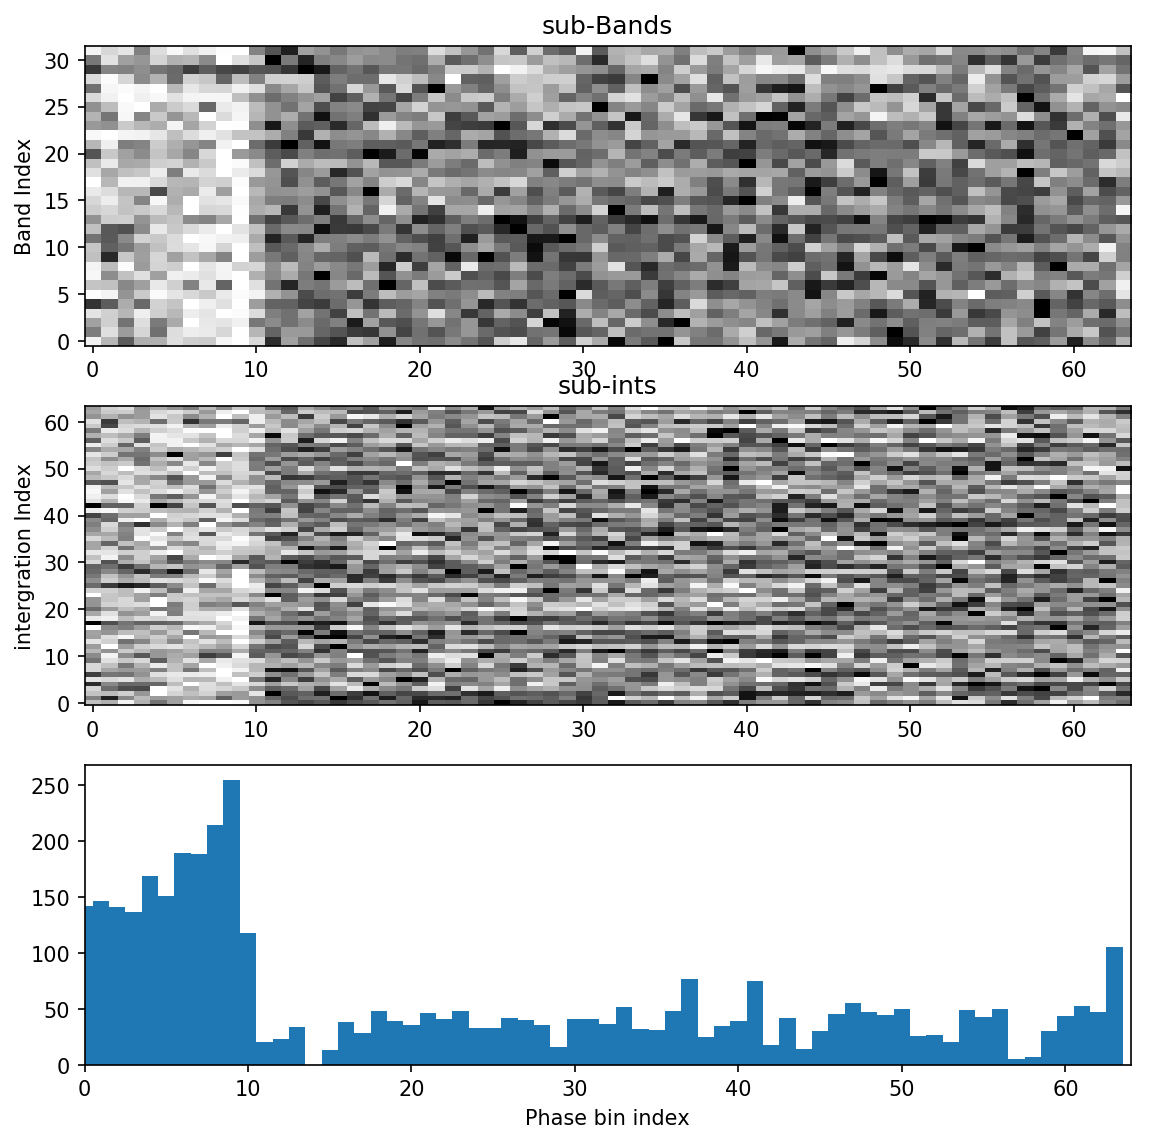

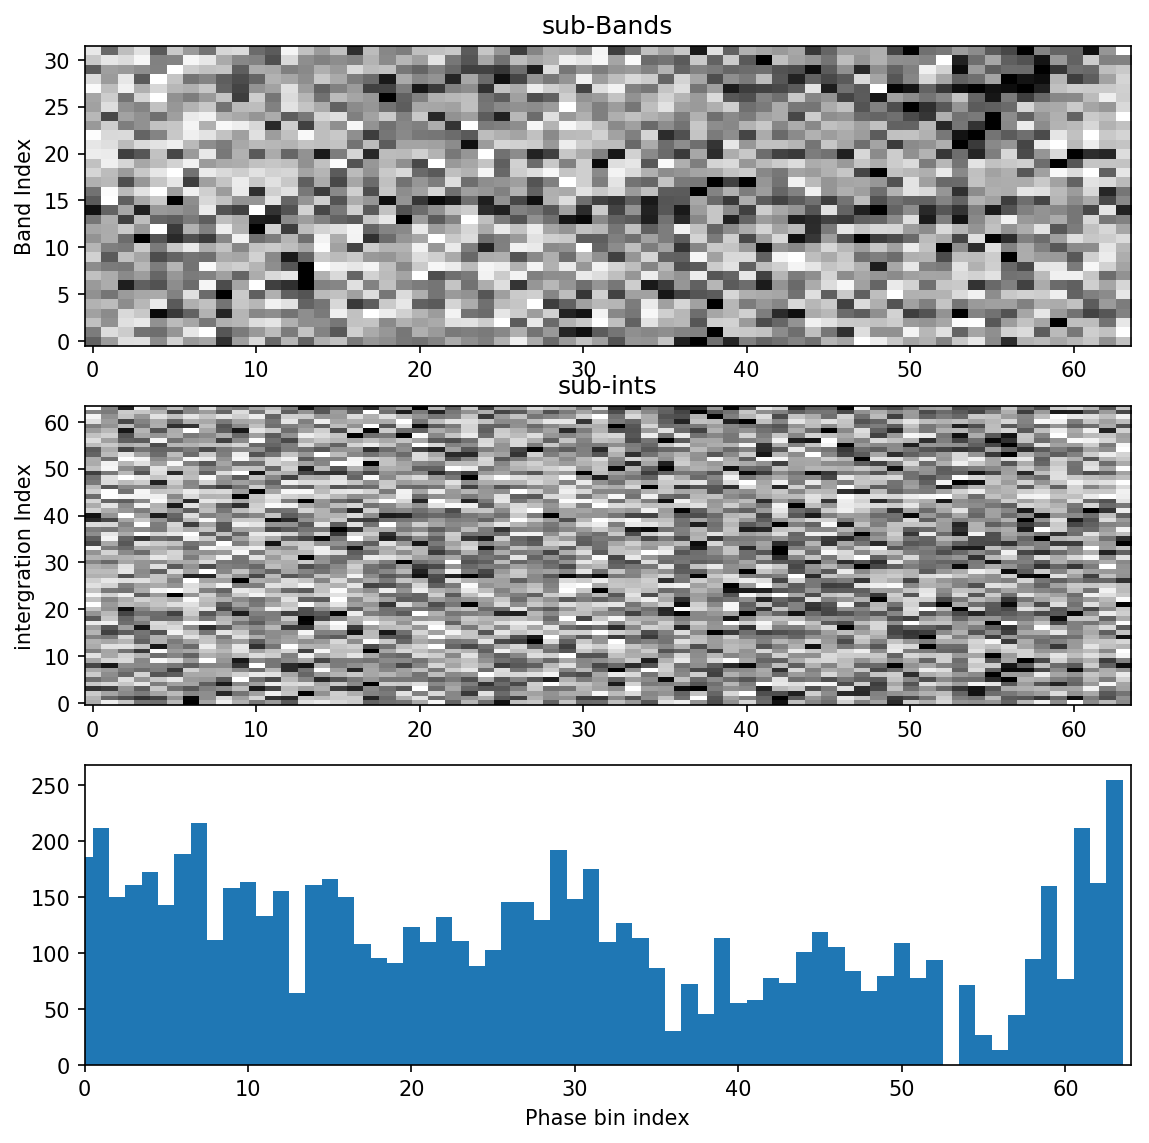

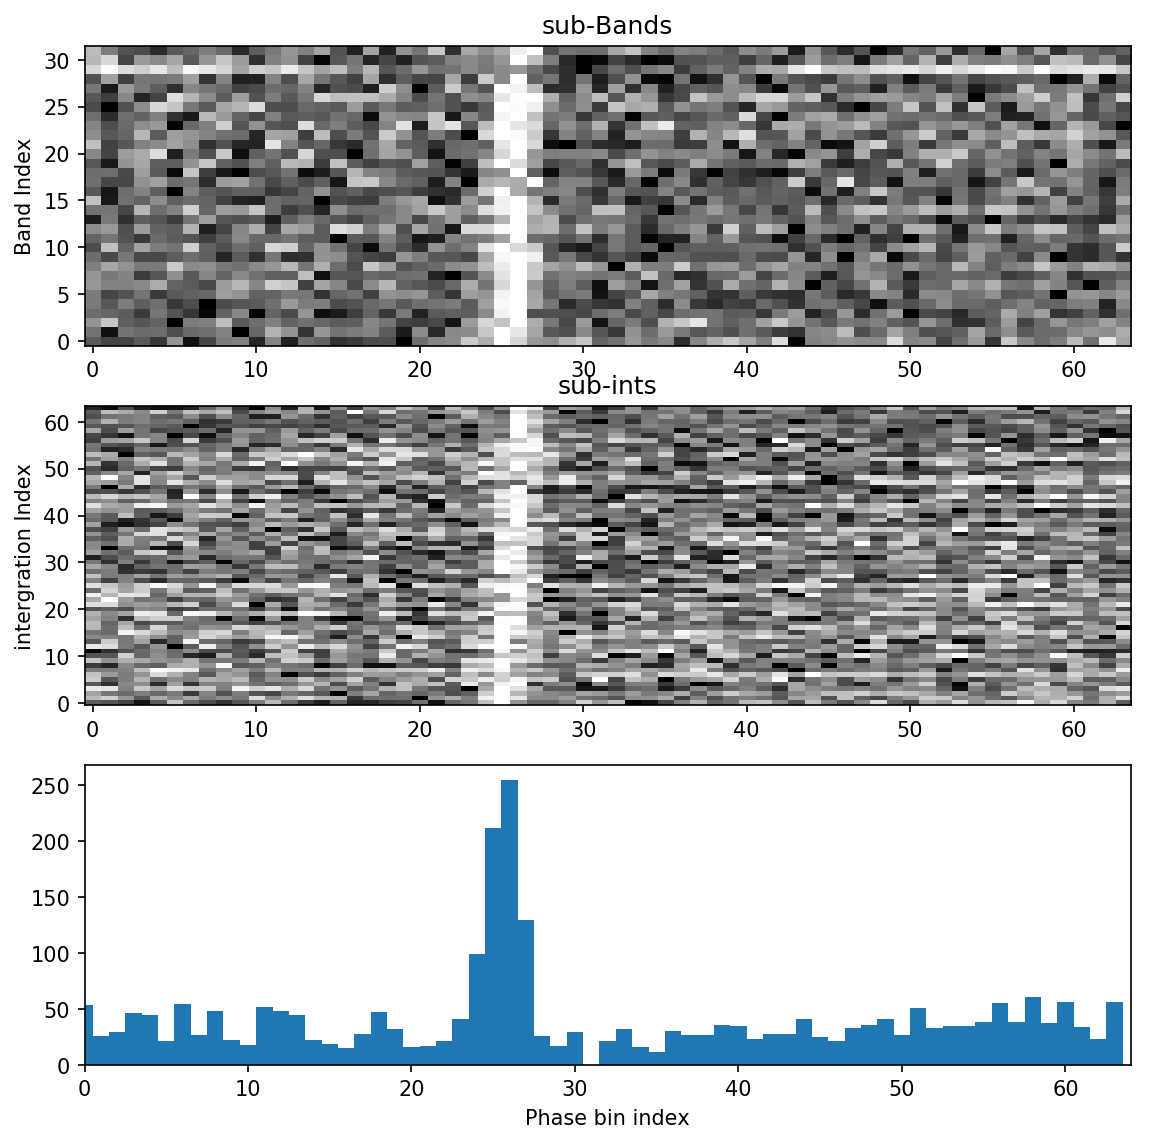

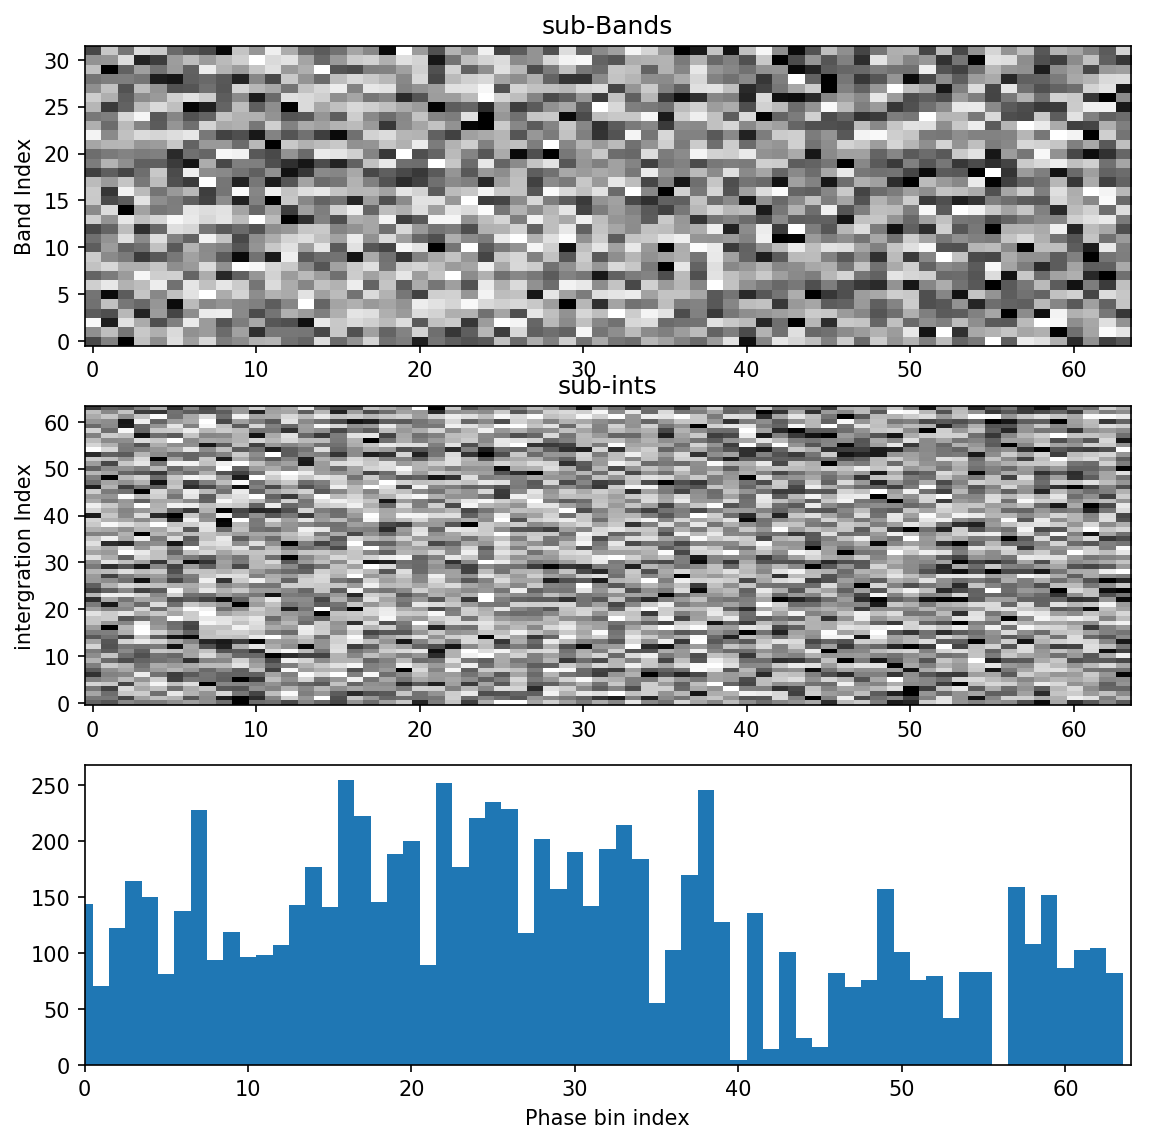

In [145]:
for i in range(10):
	plot_subbands(l[i])
	plot_subbands(n[i])